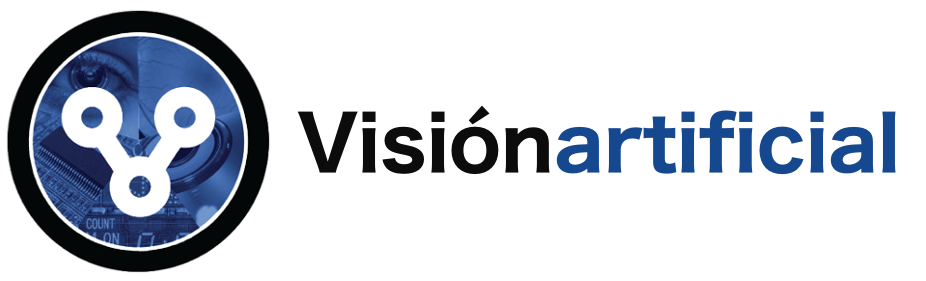

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Detector de puntos DoG</font>

O detector de puntos de interés baseado en Diferencia de Gaussianas (DoG)foi introducida por David Lowe no seu artigo do ICCV de 1999, [Object recognition from local scale-invariant features](./artigos/lowe_1999.pdf). Este detector chámase comunmente detector de puntos clave **SIFT**; non obstante, isto é tecnicamente incorrecto. No seu traballo, Lowe introduce tanto un **detector de puntos clave** como un **descritor** de imaxes. O detector de puntos clave chámase Diferenza de Gaussianas (DoG) e o descritor de imaxe, chamado SIFT, para cada puntos clave detectado por DoG, xera un vector de características (128-dim).

Esta discrepancia nas nomeclaturas causa confusión, especialmente se estás estudando os detectores de puntos clave e os descritores invariantes locais. **Incluso a biblioteca OpenCV refírese ao detector de puntos clave DoG como SIFT!**

Para o resto deste curso, cando mencionemos DoG, estaremos referíndonos ao detector de puntos clave e cando falemos de SIFT será referente ao descritor da imaxe. Esperemos que isto che aclare as ambigüidades!

## <font style="color:rgb(50,120,229)">Obxectivo:</font>

Neste caderno, trataremos de ilustar os pasos básicos do detector DoG e que te conformes unha idea intuitiva do que está a suceder baixo o capó da función OPenCV. Para máis detalles, consulte a publicación de Lowe [Object recognition from local scale-invariant features](./artigos/lowe_1999.pdf)


## <font style="color:rgb(50,120,229)">Como funciona o detector DOG?</font>

O DoG úsase para detectar rexións similares a "blob" nunha imaxe. Estas manchas poden ser esquinas, bordes ou combinacións dos dous.

Non obstante, o que realmente diferencia a DoG doutros detectores de puntos clave é a noción de espazo de escalas, onde queremos recoñecer un obxecto (neste caso, un libro) por moi preto ou lonxe que apareza.


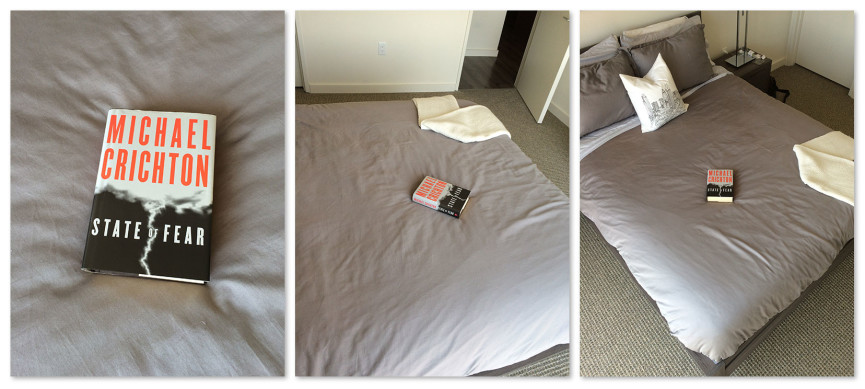

Ten en conta que a medida que nos afastamos do libro, o obxecto parece ser máis pequeno. Pola contra, canto máis nos achegamos ao libro, máis grande parece ser. A pregunta é, como detectamos puntos clave repetibles nestas imaxes, aínda que a escala e o ángulo do punto de vista cambien? Lowe axudou a responder a esta pregunta utilizando espazos de escala dentro do detector de puntos clave DoG, o que nos permite atopar rexións "interesantes" e repetibles dunha imaxe, aínda que a escala cambie.

## Paso 1: Espazo de escalas

O primeiro paso do detector de puntos clave DoG é xerar as imaxes espaciais a escala. Aquí, tomamos a imaxe orixinal e creamos versións progresivamente suavizadas dela. Despois reducimos á metade o tamaño da imaxe e repetimos. Aquí tes un exemplo dun conxunto de imaxes espaciais a escala:

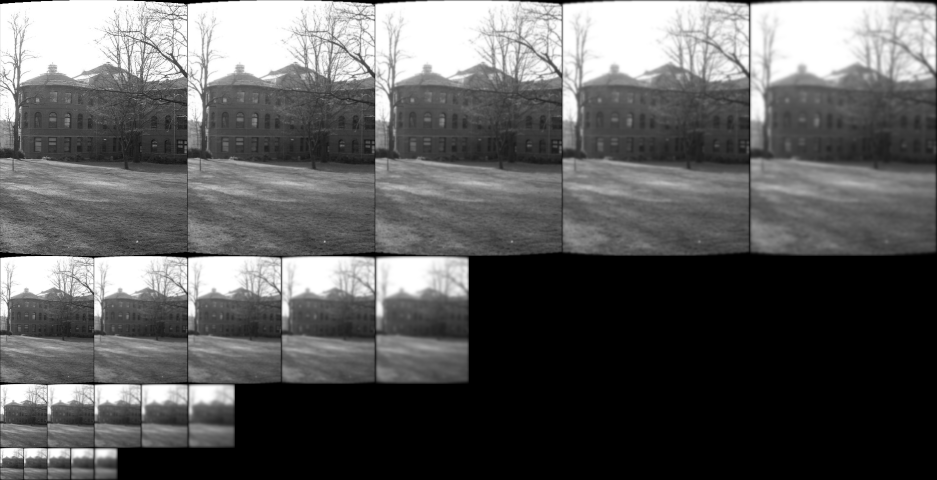

As imaxes que teñen o mesmo tamaño (filas) chámanse oitavas. Aquí, detallamos catro e cada unha a ten cinco imaxes. Cada imaxe da oitavacada vez é máis suavizada polo kernel gaussiano.

## Paso 2: Diferenza de Gaussianas

O segundo paso, consiste en aproximas a Laplaciana mediante Diferencias de Gaussianas (de aí toma o seu nome este detector DoG). Para isto, tomamos dúas imaxes consecutivas na oitava e restámolas unha da outra. Despois pasamos ás dúas imaxes consecutivas seguintes na oitava e repetimos o proceso. A seguinte imaxe amosa este proceso (xa estudado no cadernos de pirámides de imaxes):

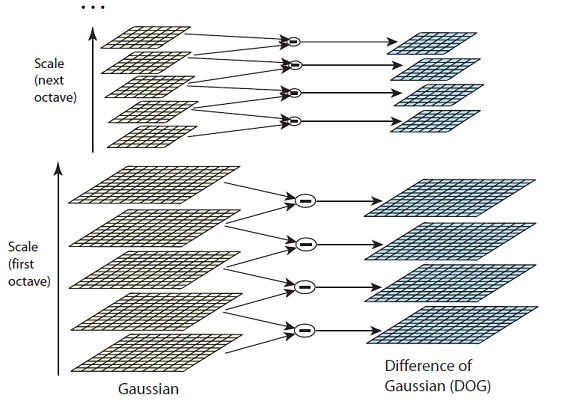


## Paso 3: atopar máximos e mínimos locais

Agora que construímos a diferenza de gaussianas, podemos pasar ao terceiro paso, que é atopar máximos e mínimos locais nas imaxes DoG.

Para cada par de imaxes de DoG, imos detectar mínimos e máximos locais. Considere o píxel marcado **X** na seguinte figura, xunto cos seus 8 veciños circundantes:

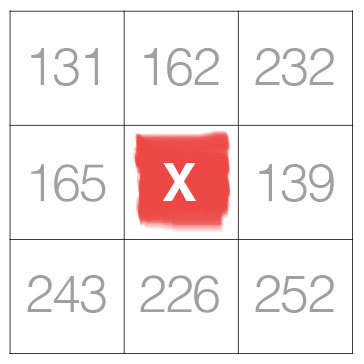

Este píxel **X** pódese considerar un "punto clave" se o valor de intensidade do píxel é maior ou menor que todos os seus 8 veciños circundantes.

Ademais, aplicaremos esta comprobación á capa superior e inferior:

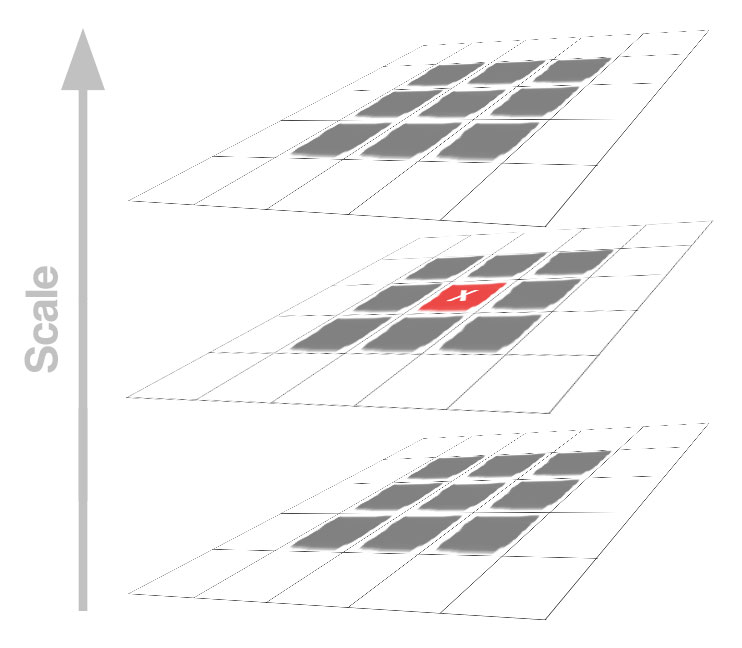

Polo que agora fanse un total de 26 comprobacións. De novo, se o píxel X é maior ou menor que os 26 dos seus veciños, entón pódese considerar un punto clave.

Finalmente, recollemos todos os píxeles situados como máximos e mínimos en todas as oitavas e marcamos estes como puntos clave. Despois realízase a poda/limiar para eliminar os puntos clave de baixo contraste.

O detector DoG é bo para detectar puntos clave repetibles en imaxes, mesmo con cambios substanciais no punto de vista. Non obstante, o maior inconveniente de DoG é que **non é moi rápido e non é adecuado para aplicacións en tempo real**.

DoG aínda é amplamente utilizado en aplicacións reais de visión artificial e é un estándar co que comparar novos algoritmos de detección de puntos clave.

## Para que se emprega o detector DoG?

O detector DoG úsase para detectar estruturas tipo "blob" nas imaxes. Estas manchas poden ser esquinas, bordes ou unha combinación dos dous.

## Exemplo de uso da DoG:

De novo, como mencionei ao principio desta lección, hai bastante ambigüidade sobre o que significa o termo "SIFT". O detector de puntos clave usado no algoritmo SIFT é en realidade a "Diferenza de Gaussianas", ou simplemente DoG. SIFT é, en realidade, un **descritor de funcións**, que trataremos máis adiante neste curso.

**Nota: Lembra que OpenCV chama SIFT ao detector de puntos clave DoG pero en realidade é DoG.**

Vexamos un exemplo:

In [5]:
# importamos paquetes necesarios
from __future__ import print_function
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# de keypoints: 660


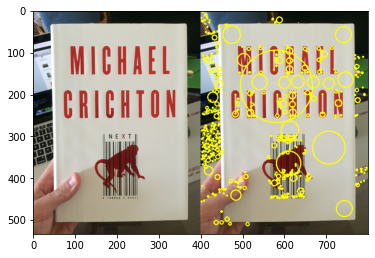

In [9]:
# cargamos a imaxe e pasamola a gris
image = cv2.imread("../data/next.png")
if image is None:
	print("Imaxe non atopada")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detectmos puntos clave mediante diferencias de gaussianas (DoG() para OpenCV > 3.x
# E a mesma estratexia que emprega SIFT para a deteccion inicial de puntos clave
detector = cv2.SIFT_create()
(kps, _) = detector.detectAndCompute(gray, None)
print("# de keypoints: {}".format(len(kps)))

# Lazo sobre os puntos clave detectados e anotamolos cun circulo
for kp in kps:
	r = int(0.5 * kp.size)
	(x, y) = np.int0(kp.pt)
	cv2.circle(image, (x, y), r, (0, 255, 255), 2)
    
# Visualiamos a imaxe
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(image);
plt.imshow(np.hstack([orig, image]));